# A Probabilistic Approach to Predicting Lithology from Drilling Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns", None)
from matplotlib.gridspec import GridSpec

In [2]:
drilling_data= pd.read_csv("Drilling_F_15.csv")

In [3]:
drilling_data.head()

,Depth,LAGMWT,Time,EditFlag,TORQUE,MOTOR_RPM,STRATESUM,MWOUT,LAGMWDIFF,MWIN,BIT_RPM,DXC,MUDRETDEPTH,PUMP,LAGMTEMP,RigActivityCode,MRIN,FLOWOUT,ROP_AVG,LAGMRES,TOTGAS,MROUT,MTIN,LAGMRDIFF,FLOWIN,WOB,ONBOTTOM_TIME,ECDBIT,MTOUT,BIT_DIST,SURF_RPM,LAGMTDIFF,LITH
0,3300.0,1280.0000,2013-11-28 12:54:29,0.0,3768.1461,0.0,0.300773,1280.0000,0.000000,1280.0000,0.267094,0.987674,3299.0000,3112134.6,0.0,111.0,0.0,0.016037,0.005075,0.0,0.000108,0.0,0.0,0.0,0.006662,-19762.743,194.0,1293.6605,0.0,0.995211,0.267094,0.0,claystone
1,3305.0,1280.0000,2013-11-28 16:48:21,0.0,20991.5430,0.0,1.674558,1306.2254,26.225434,1306.2254,1.314148,0.987674,3301.7245,17932214.0,0.0,111.0,0.0,0.038981,0.004088,0.0,0.000183,0.0,0.0,0.0,0.037091,26217.864,1617.0,1360.8740,0.0,5.995622,1.314720,0.0,marl
2,3310.0,1315.2258,2013-11-28 17:01:59,0.0,22610.3830,0.0,1.766764,1320.0146,4.788793,1320.0146,1.328706,0.987674,3301.7245,20878002.0,0.0,111.0,0.0,0.041079,0.005159,0.0,0.000176,0.0,0.0,0.0,0.039134,83492.293,2435.0,1382.0713,0.0,10.997926,1.328674,0.0,marl
3,3315.0,1320.0008,2013-11-28 17:46:39,0.0,24296.9810,0.0,1.768285,1320.0000,-0.000815,1320.0000,1.420887,0.987674,3302.8926,20728354.0,0.0,111.0,0.0,0.041359,0.005971,0.0,0.000188,0.0,0.0,0.0,0.039168,97087.882,3442.0,1381.7741,0.0,15.997564,1.420116,0.0,claystone
4,3320.0,1320.0000,2013-11-28 18:02:50,0.0,24931.3130,0.0,1.783305,1320.0000,-0.000002,1320.0000,1.595948,0.987674,3306.1559,20553813.0,0.0,111.0,0.0,0.043607,0.005419,0.0,0.000276,0.0,0.0,0.0,0.039500,54793.206,4333.0,1381.5933,0.0,20.990649,1.593931,0.0,claystone


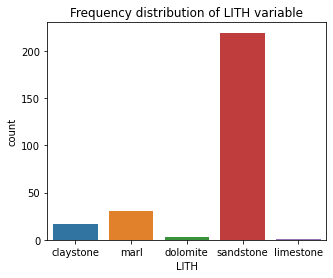

sandstone    219
marl          30
claystone     17
dolomite       3
limestone      1
Name: LITH, dtype: int64

In [4]:
#Function for plotting univariate visualization for categorical variables.. 
def visualize(column,df=drilling_data):
    f, ax = plt.subplots(figsize=(5, 4))
    ax = sns.countplot(x=column, data=df)
    plt.title(f'Frequency distribution of {column} variable')
    plt.show()
    return drilling_data[column].value_counts()
visualize('LITH',drilling_data)

In [5]:
delusive_features = ["LAGMWT","EditFlag","MOTOR_RPM","MWIN","MWOUT","LAGMWDIFF","DXC","LAGMTEMP","RigActivityCode",
                     "MRIN","MROUT","LAGMRES","MTIN","LAGMRDIFF","MTOUT","LAGMTDIFF"]
drilling_data = drilling_data.drop(delusive_features,axis=1)

In [6]:
drilling_data.describe()

,Depth,TORQUE,STRATESUM,BIT_RPM,MUDRETDEPTH,PUMP,FLOWOUT,ROP_AVG,TOTGAS,FLOWIN,WOB,ONBOTTOM_TIME,ECDBIT,BIT_DIST,SURF_RPM
count,270.000000,270.000000,270.000000,270.000000,270.000000,2.700000e+02,270.000000,270.000000,270.000000,270.000000,2.700000e+02,270.000000,270.000000,270.000000,270.000000
mean,3972.500000,23202.812737,1.771964,2.256738,3953.310657,2.176002e+07,0.040427,0.007849,0.013366,0.039249,5.719351e+04,93992.596296,1426.034022,673.669656,2.259118
std,390.432453,3112.536293,0.167199,0.411088,389.231491,2.596844e+06,0.002926,0.001356,0.009683,0.003703,1.214337e+05,50273.635788,24.994906,390.303153,0.399405
min,3300.000000,993.720810,0.009412,0.010555,3299.000000,1.396055e+06,0.013956,0.002652,0.000108,0.000208,-4.300360e+04,194.000000,1293.660500,0.995211,0.267094
25%,3636.250000,22016.708500,1.783333,1.999400,3613.026900,2.093404e+07,0.039902,0.007384,0.004562,0.039501,3.703277e+04,54254.000000,1422.473825,337.243167,1.999491
50%,3972.500000,23244.919000,1.800000,2.018128,3960.086700,2.183466e+07,0.040367,0.008160,0.013085,0.039870,4.562943e+04,95605.500000,1434.639300,673.491320,2.018037
75%,4308.750000,25137.036500,1.800000,2.663847,4289.439275,2.317562e+07,0.041337,0.008713,0.021181,0.039870,5.495820e+04,136204.500000,1443.022700,1009.733900,2.663892
max,4645.000000,31208.191000,1.816672,3.000916,4622.785100,2.547392e+07,0.044405,0.010447,0.036226,0.040239,1.857840e+06,181514.000000,1451.645600,1345.992300,3.000691


<AxesSubplot:>

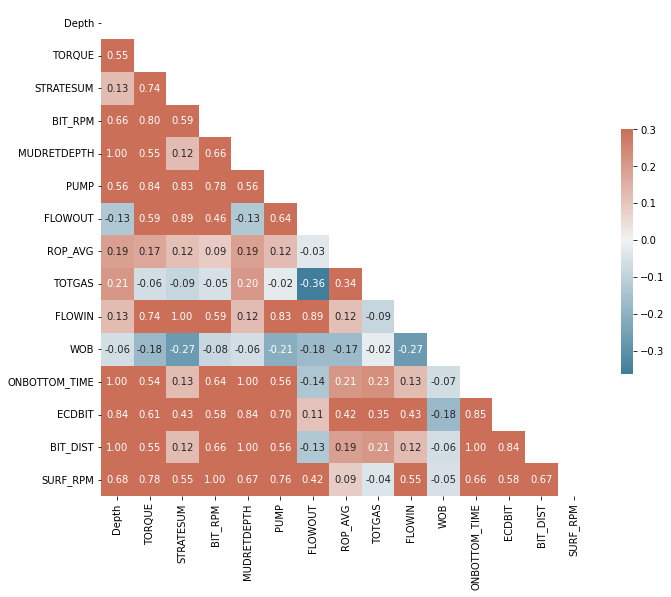

In [7]:
#correlation heatmap plot
corr = drilling_data.corr()
mask= np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,center=0,square=True,annot=True, fmt='.2f',vmax=.3,cbar_kws={'shrink':.5})

In [8]:
drilling_data=drilling_data[(drilling_data.WOB<1e6) & (drilling_data.WOB>0)]
drilling_data=drilling_data[(drilling_data.LITH!= 'limestone') & (drilling_data.LITH!= 'dolomite')]

In [9]:
highly_correlated= [ "BIT_DIST", "ONBOTTOM_TIME","FLOWIN","SURF_RPM","Time",'MUDRETDEPTH','Depth']
drilling_data = drilling_data.drop(highly_correlated,axis=1)
drilling_data.columns

Index(['TORQUE', 'STRATESUM', 'BIT_RPM', 'PUMP', 'FLOWOUT', 'ROP_AVG',
       'TOTGAS', 'WOB', 'ECDBIT', 'LITH'],
      dtype='object')

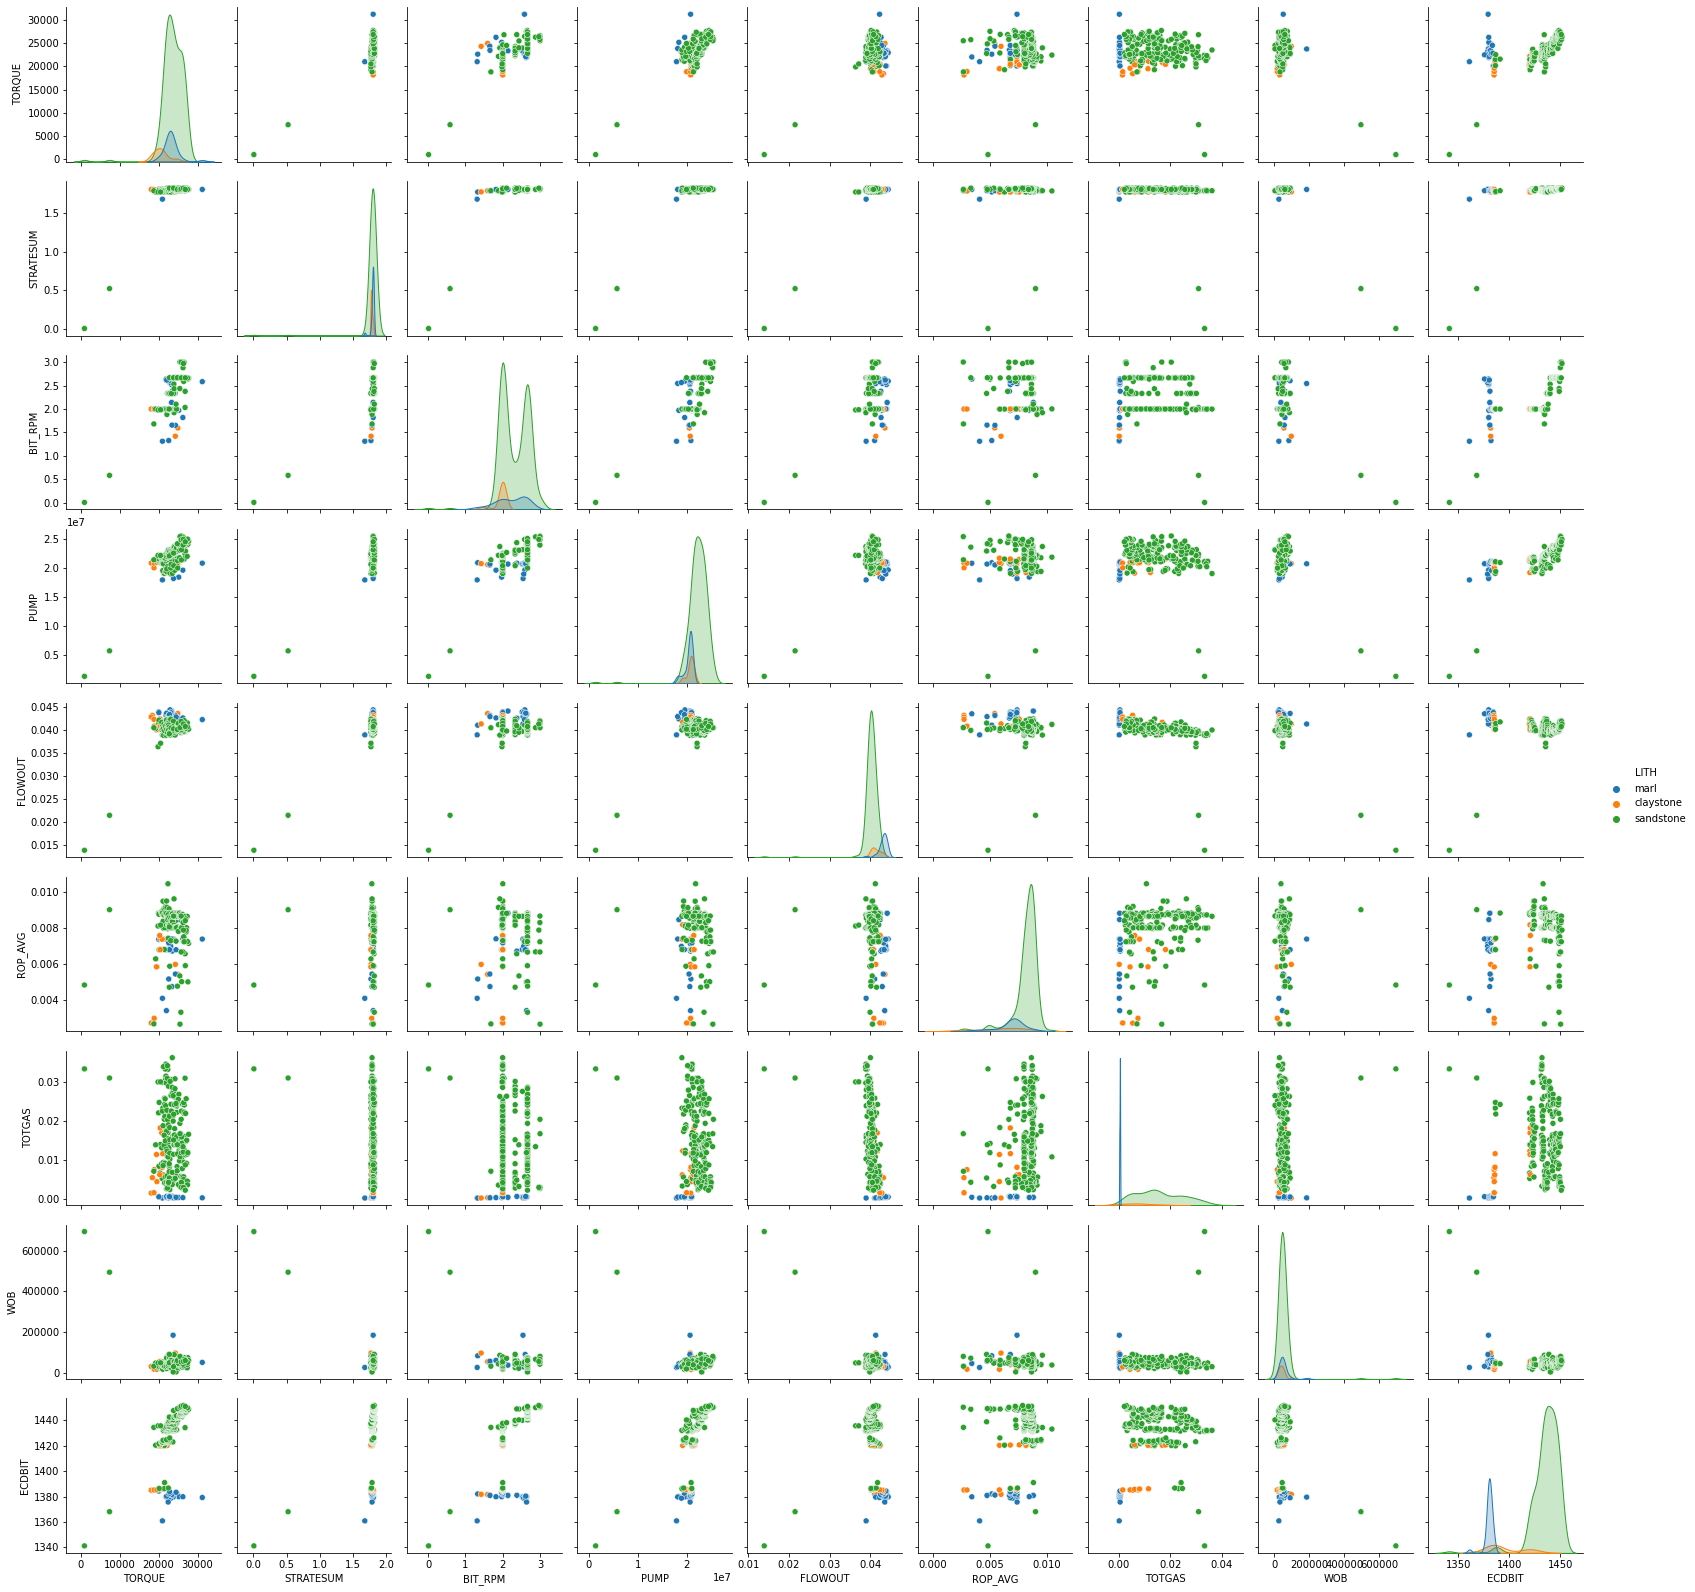

In [57]:
features = ['TORQUE', 'STRATESUM', 'BIT_RPM', 'PUMP', 'FLOWOUT', 'ROP_AVG',
       'TOTGAS', 'WOB', 'ECDBIT']
sns.pairplot(data= drilling_data,vars =features, kind='scatter', diag_kind='kde',hue="LITH")
plt.show()

In [10]:
drilling_data.reset_index(inplace=True)
drilling_data.head()

,index,TORQUE,STRATESUM,BIT_RPM,PUMP,FLOWOUT,ROP_AVG,TOTGAS,WOB,ECDBIT,LITH
0,1,20991.543,1.674558,1.314148,17932214.0,0.038981,0.004088,0.000183,26217.864,1360.8740,marl
1,2,22610.383,1.766764,1.328706,20878002.0,0.041079,0.005159,0.000176,83492.293,1382.0713,marl
2,3,24296.981,1.768285,1.420887,20728354.0,0.041359,0.005971,0.000188,97087.882,1381.7741,claystone
3,4,24931.313,1.783305,1.595948,20553813.0,0.043607,0.005419,0.000276,54793.206,1381.5933,claystone
4,5,24330.264,1.783333,1.653237,20492430.0,0.043191,0.005435,0.000253,50301.579,1381.1635,marl


In [11]:
drilling_data['LITH'].replace({"marl":0,'claystone':1,"sandstone":2},inplace=True)


In [12]:
drilling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      262 non-null    int64  
 1   TORQUE     262 non-null    float64
 2   STRATESUM  262 non-null    float64
 3   BIT_RPM    262 non-null    float64
 4   PUMP       262 non-null    float64
 5   FLOWOUT    262 non-null    float64
 6   ROP_AVG    262 non-null    float64
 7   TOTGAS     262 non-null    float64
 8   WOB        262 non-null    float64
 9   ECDBIT     262 non-null    float64
 10  LITH       262 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 22.6 KB


In [13]:
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

## Cross-validation test

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold,cross_val_predict
kf = KFold(n_splits=5,shuffle=True, random_state=203)
from sklearn.ensemble import AdaBoostClassifier
def evaluate(estimator):
    
    X = drilling_data[['TORQUE', 'STRATESUM', 'BIT_RPM', 'PUMP', 'FLOWOUT', 'ROP_AVG',
           'TOTGAS', 'WOB', 'ECDBIT']]
    y = drilling_data.LITH
    y_prob_pred =cross_val_predict(estimator, X, y, cv=kf, method='predict_proba')
    ovo_roc =  roc_auc_score(y, y_prob_pred, multi_class='ovo', average='weighted')
    ovr_roc = roc_auc_score(y, y_prob_pred, multi_class='ovr', average='weighted')
    print(f"OVO AUC: {ovo_roc}")
    print(f"OVR AUC: {ovr_roc}")

In [15]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier()
evaluate(estimator)

OVO AUC: 0.9854577084088949
OVR AUC: 0.9933841351321814


### Train-Test-split
- Split dataset into train and test set in ratio 60:40

In [16]:

X = drilling_data[['TORQUE', 'STRATESUM', 'BIT_RPM', 'PUMP', 'FLOWOUT', 'ROP_AVG',
       'TOTGAS', 'WOB', 'ECDBIT']]
y = drilling_data.LITH
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size=0.4,shuffle=True, stratify =y,random_state=62)
estimator.fit(xtrain,ytrain)
y_prob_pred = estimator.predict_proba(xtest)
ovr_roc = roc_auc_score(ytest, y_prob_pred, multi_class='ovr', average='weighted')
ovo_roc =  roc_auc_score(ytest, y_prob_pred, multi_class='ovo', average='weighted')
print(f"OVO AUC: {ovo_roc}")
print(f"OVR AUC: {ovr_roc}")

OVO AUC: 0.9752873563218389
OVR AUC: 0.9937330292169002


In [17]:
y_prob_pred

array([[0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.03, 0.97],
       [0.  , 0.01, 0.99],
       [0.  , 0.12, 0.88],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.99, 0.01, 0.  ],
       [0.  , 0.05, 0.95],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.99, 0.01, 0.  ],
       [0.  , 0.03, 0.97],
       [0.  , 0.  , 1.  ],
       [0.36, 0.59, 0.05],
       [0.01, 0.54, 0.45],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.01, 0.  , 0.99],
       [0.01, 0.21, 0.78],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.08, 0.57, 0.35],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
 

In [ ]:
- The predictions represent the probabiloity that each test